In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
size = 100
path = "augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/"

Displaying images from the 'MildDemented' category:


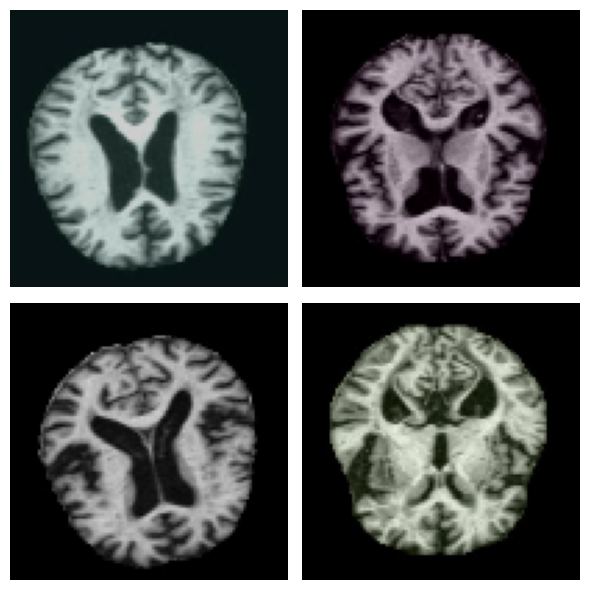

In [3]:
subclass = "MildDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

Displaying images from the 'ModerateDemented' category:


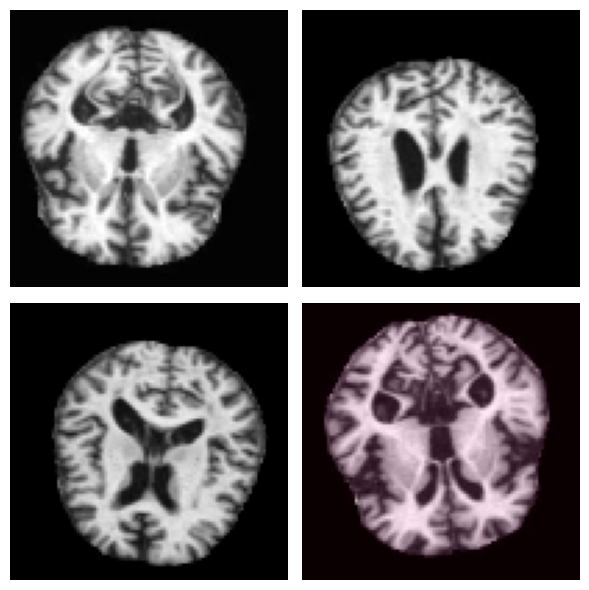

In [4]:
subclass = "ModerateDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

Displaying images from the 'VeryMildDemented' category:


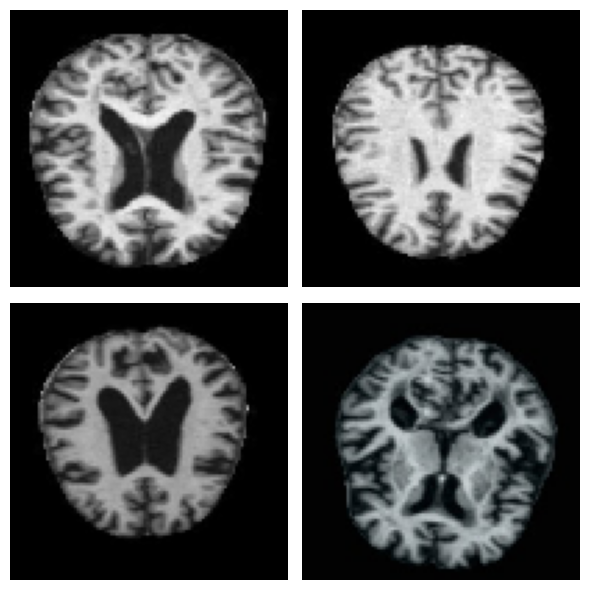

In [5]:
subclass = "VeryMildDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

Displaying images from the 'NonDemented' category:


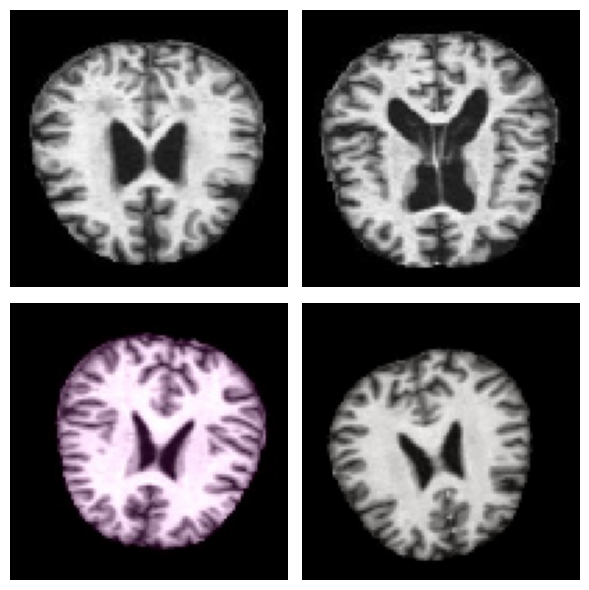

In [6]:
subclass = "NonDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [7]:
data_dir = pathlib.Path(path)

In [8]:
size_per_class = 3000

Mild_Demented = random.sample(list(data_dir.glob('MildDemented/*')), size_per_class)
Moderate_Demented = random.sample(list(data_dir.glob('ModerateDemented/*')), size_per_class)
Very_Mild_Demented = random.sample(list(data_dir.glob('VeryMildDemented/*')), size_per_class)
Non_Demented = random.sample(list(data_dir.glob('NonDemented/*')), size_per_class)

print(f"Selected {len(Mild_Demented)} images for Mild Demented class.")
print(f"Selected {len(Moderate_Demented)} images for Moderate Demented class.")
print(f"Selected {len(Very_Mild_Demented)} images for Very Mild Demented class.")
print(f"Selected {len(Non_Demented)} images for Non Demented class.")

Selected 3000 images for Mild Demented class.
Selected 3000 images for Moderate Demented class.
Selected 3000 images for Very Mild Demented class.
Selected 3000 images for Non Demented class.


In [9]:
df_images = {'Mild_Demented': Mild_Demented, 'Moderate_Demented': Moderate_Demented, 
             'Very_Mild_Demented': Very_Mild_Demented, 'Non_Demented': Non_Demented}

df_labels = {'Mild_Demented': 0, 'Moderate_Demented': 1, 'Very_Mild_Demented': 2, 'Non_Demented': 3}

In [10]:
x, y = [], []
image_size = (75, 75)

for label, image_paths in df_images.items():
    for img_path in image_paths:
        try:
            img = imread(str(img_path))
            resized_img = resize(img, image_size, anti_aliasing=True)
            x.append(resized_img)
            
            y.append(df_labels[label])
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

x = np.array(x)
y = np.array(y)

In [11]:
x = x/255.0

In [12]:
y = np.asarray(y).astype('float32').reshape((-1,1))
y = to_categorical(y, num_classes = 4)

In [13]:
from sklearn.model_selection import train_test_split
y = np.asarray(y).astype('float32')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [14]:
len(x_train)

9600

In [15]:
len(x_test)

2400

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

In [17]:
epochs = 20
input_shape = (75, 75, 3)

In [18]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 73, 73, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 34, 34, 64)       256       
 hNormalization)                                                 
                                                        

In [19]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
300/300 [==============================] - 189s 602ms/step - loss: 1.4469 - accuracy: 0.2937 - val_loss: 4.1938 - val_accuracy: 0.2483
Epoch 2/20
300/300 [==============================] - 172s 574ms/step - loss: 1.3700 - accuracy: 0.2794 - val_loss: 1.5713 - val_accuracy: 0.2479
Epoch 3/20
300/300 [==============================] - 176s 586ms/step - loss: 1.3130 - accuracy: 0.3435 - val_loss: 1.2596 - val_accuracy: 0.4321
Epoch 4/20
300/300 [==============================] - 168s 561ms/step - loss: 1.2656 - accuracy: 0.3851 - val_loss: 1.1766 - val_accuracy: 0.4883
Epoch 5/20
300/300 [==============================] - 171s 568ms/step - loss: 1.2293 - accuracy: 0.4165 - val_loss: 1.1485 - val_accuracy: 0.5050
Epoch 6/20
300/300 [==============================] - 181s 603ms/step - loss: 1.2045 - accuracy: 0.4395 - val_loss: 1.0614 - val_accuracy: 0.5717
Epoch 7/20
300/300 [==============================] - 164s 547ms/step - loss: 1.1863 - accuracy: 0.4551 - val_loss: 1.3304 -

In [21]:
def training_history(history, metrics=['loss', 'accuracy'], figsize=(10, 5)):
    
    for metric in metrics:
        plt.figure(figsize=figsize)
        plt.plot(history.history[metric], label=f"Training {metric.capitalize()}")
        plt.plot(history.history[f"val_{metric}"], label=f"Validation {metric.capitalize()}")
        plt.xlabel("Epochs")
        plt.ylabel(metric.capitalize())
        plt.title(f"Training and Validation {metric.capitalize()}")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

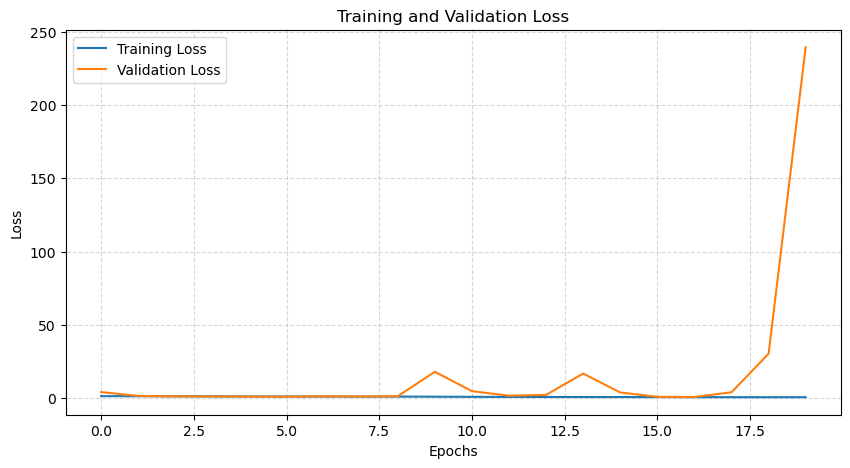

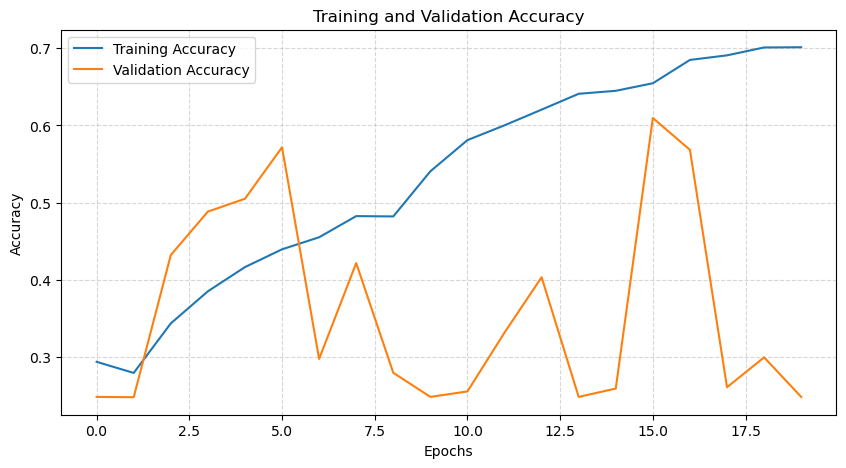

In [22]:
training_history(history)